# Install package

In [1]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 11.9 MB/s 


# Import required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
from sklearn.model_selection import train_test_split

import sweetviz as sv

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load Data

In [4]:
data_location = "bank-full.csv"
data_url = 'https://github.com/diwakarsachan/marketing-project-final/raw/main/bank-full.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: bank-full.csv


In [15]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None) 

marketing_outcome = pd.read_csv(data_location, sep=';')
print('Orignal Shape of the data : ',marketing_outcome.shape)


Orignal Shape of the data :  (45211, 17)


# EDA

In [10]:
# Sample
marketing_outcome.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2612,38,admin.,single,unknown,no,446,yes,no,unknown,13,may,386,1,-1,0,unknown,no
10289,39,services,married,secondary,no,257,yes,no,unknown,12,jun,171,1,-1,0,unknown,no
21588,36,unemployed,divorced,tertiary,no,734,no,no,cellular,19,aug,276,2,-1,0,unknown,no
20096,46,technician,married,secondary,no,6086,no,no,cellular,11,aug,210,2,-1,0,unknown,no
1066,44,entrepreneur,married,primary,no,58,yes,no,unknown,7,may,113,3,-1,0,unknown,no


In [11]:
# Using sweetviz for Initial EDA
advert_report = sv.analyze(marketing_outcome)
advert_report.show_html('Advertising.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
marketing_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Check Numeric and Categorical Features

In [20]:
numeric_data = marketing_outcome.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns

print("Numeric Features:", numeric_data.columns.values)
numeric_data.head()

Numeric Features: ['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [21]:
categorical_data = marketing_outcome.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns

print("Categorical Features:", categorical_data.columns.values)
categorical_data.head()

Categorical Features: ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y']


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


#### Missing data

In [23]:
# Finding the total missing values and arranging them in ascending order
total = marketing_outcome.isnull().sum()

# Converting the missing values in percentage
percent = (marketing_outcome.isnull().sum()/marketing_outcome.isnull().count())
print(percent)

age         0.00
job         0.00
marital     0.00
education   0.00
default     0.00
balance     0.00
housing     0.00
loan        0.00
contact     0.00
day         0.00
month       0.00
duration    0.00
campaign    0.00
pdays       0.00
previous    0.00
poutcome    0.00
y           0.00
dtype: float64


In [24]:
# No nulls in our case but for completeness adding logic to impute 
for column in numeric_col:
    mean = marketing_outcome[column].mean()
    marketing_outcome[column].fillna(mean,inplace = True)

#### Class Imbalance

In [25]:
## Check data skew
marketing_outcome.y.value_counts(normalize=True)

no    0.88
yes   0.12
Name: y, dtype: float64

Observations: The class distribution in the target is ~88:12. This is a clear indication of imbalance.

#### Data Visualizations

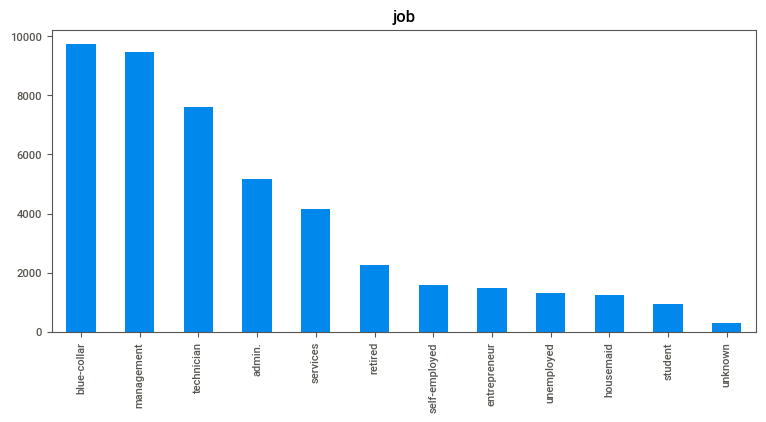

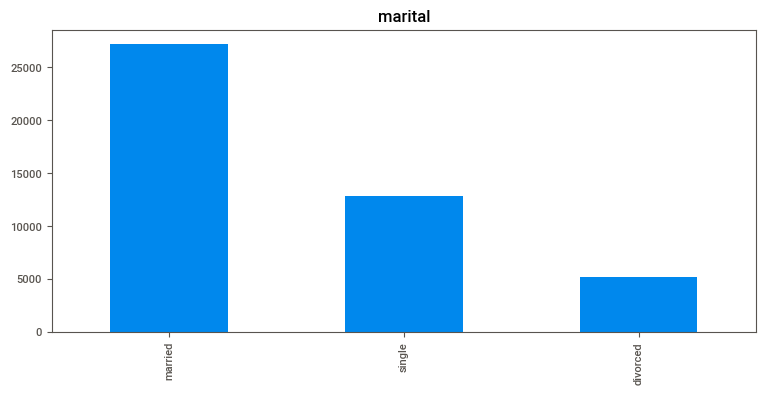

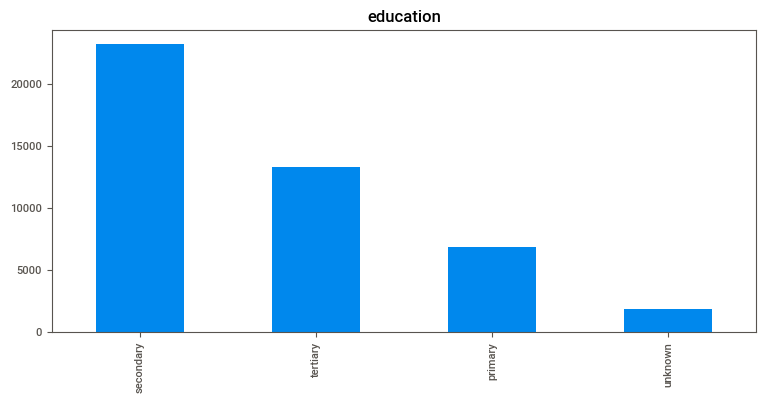

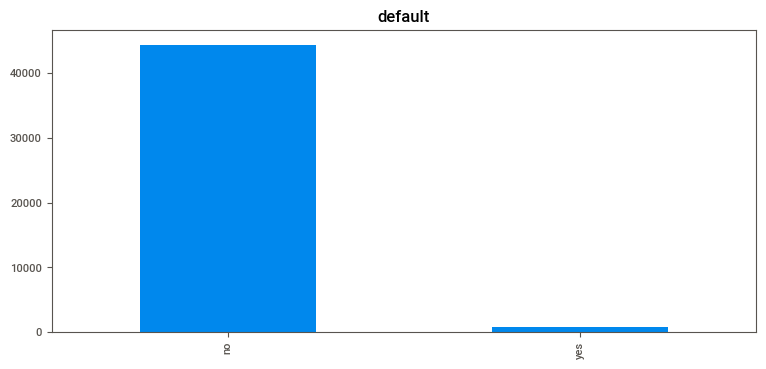

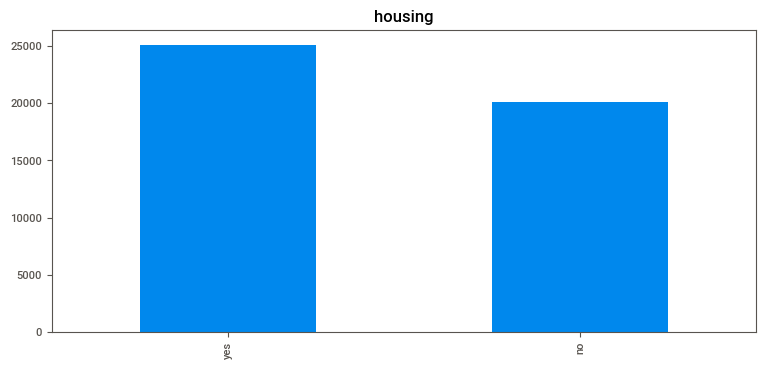

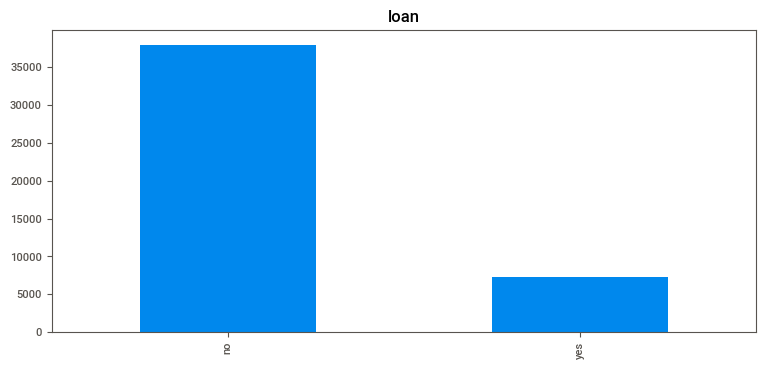

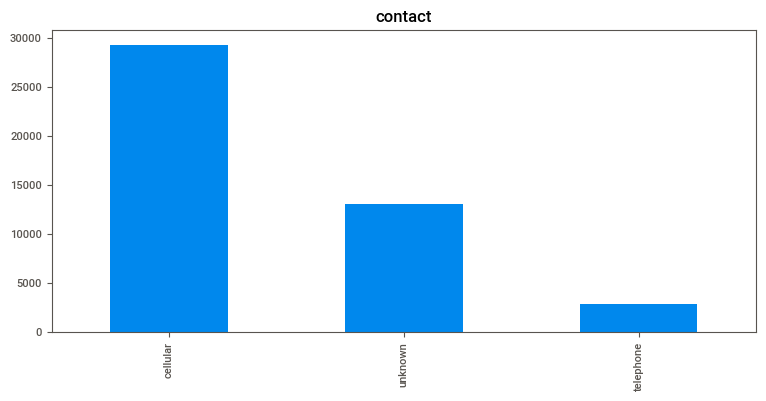

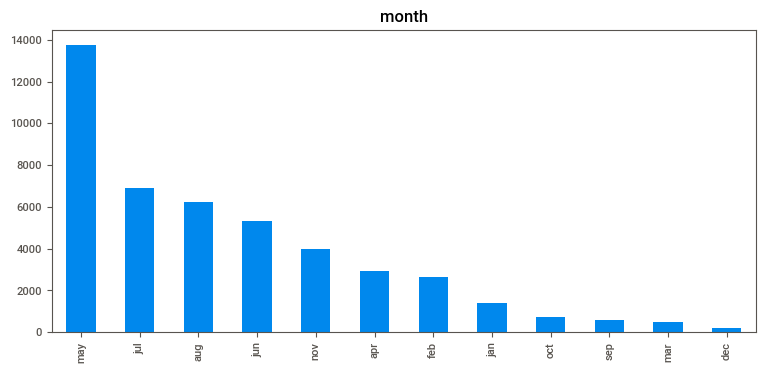

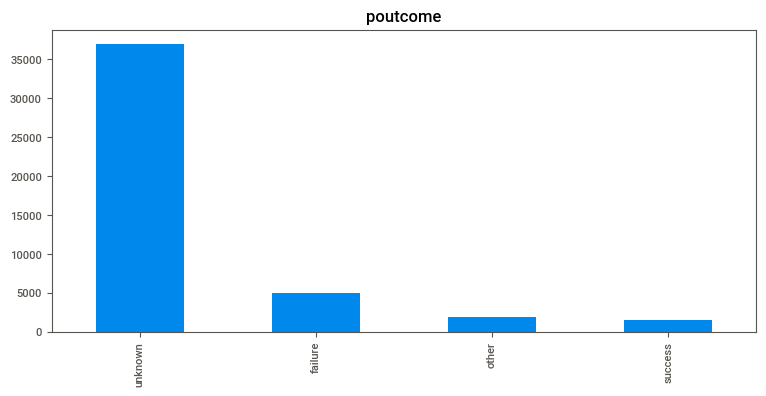

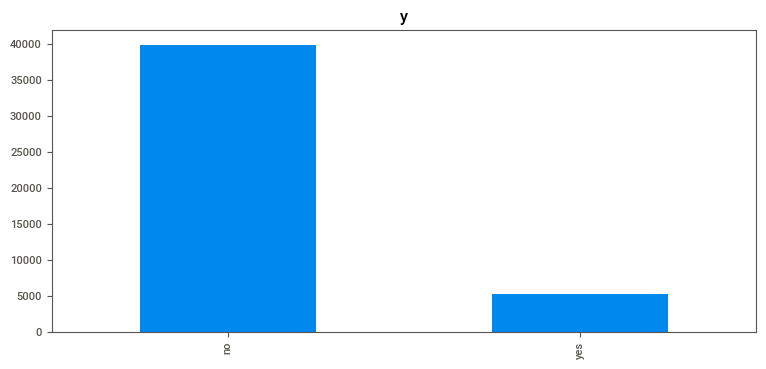

In [32]:
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    marketing_outcome[column].value_counts().plot(kind='bar')
    plt.title(column)

##### Observations : From the above visuals, we can make the following observations:

* The top three professions that our customers belong to are - administration, 
blue-collar jobs and technicians.
* A huge number of the customers are married.
* Majority of the customers do not have a credit in default
Many of our past customers have applied for a housing loan but very few have applied for personal loans.
* Cell-phones seem to be the most favoured method of reaching out to customers.
Many customers have been contacted in the month of May.
* The plot for the target variable shows heavy imbalance in the target variable.
* The missing values in some columns have been represented as unknown.

Do we need to deal with unknowns?

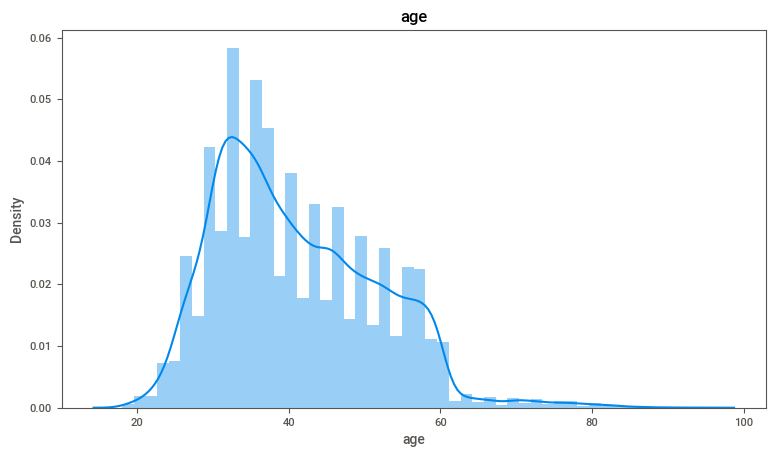

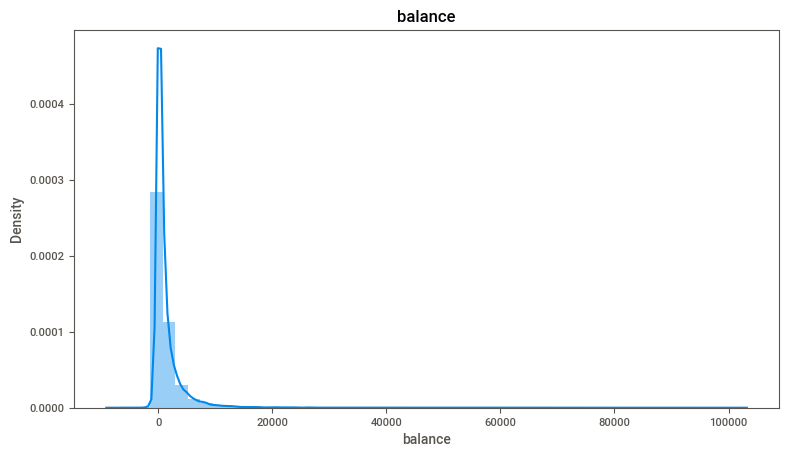

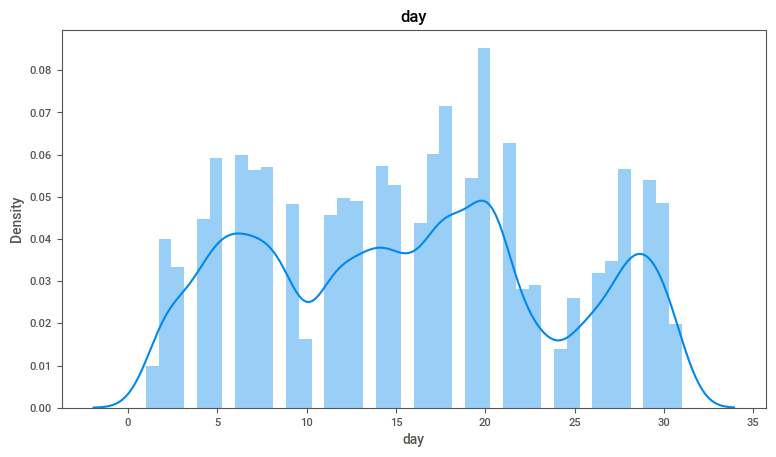

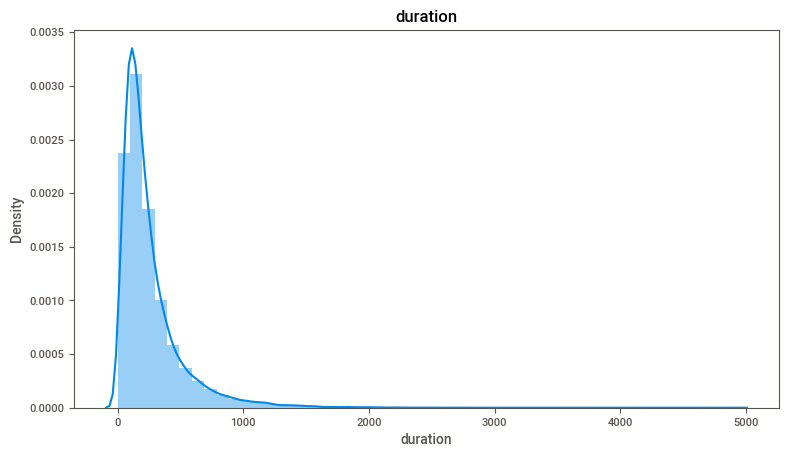

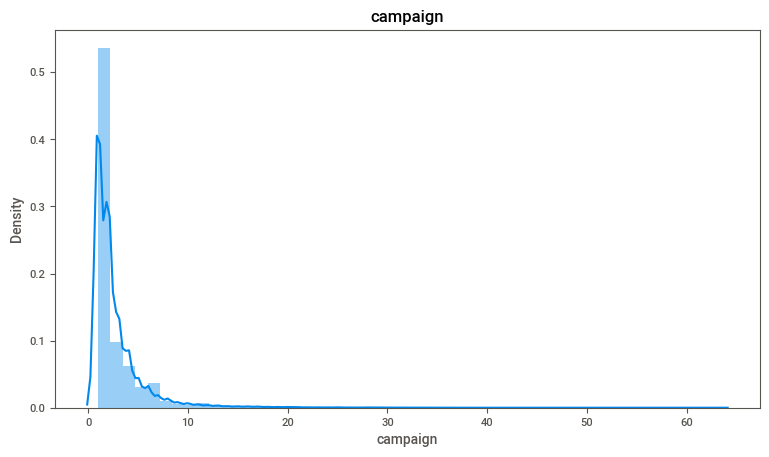

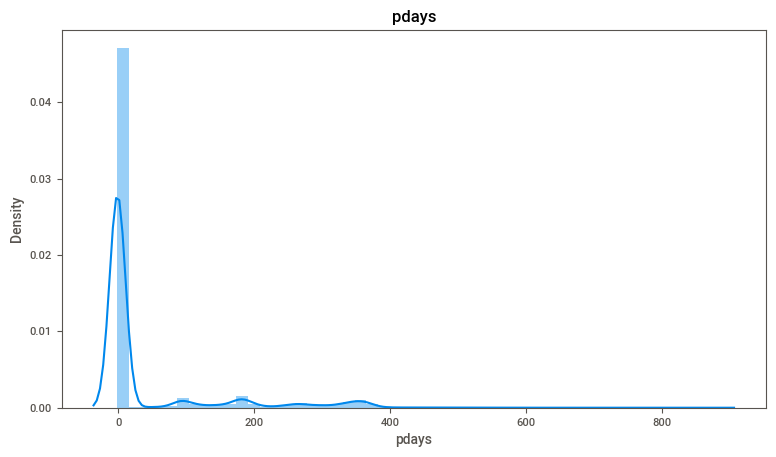

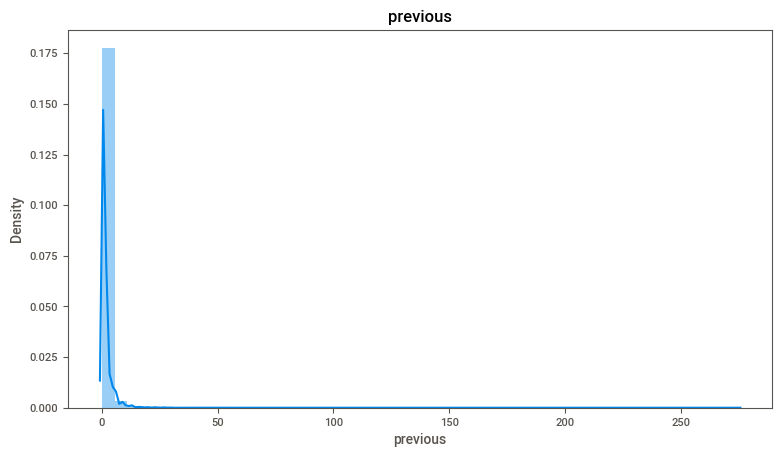

In [33]:
# Distplot for Numerics
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(marketing_outcome[column])
    plt.title(column)

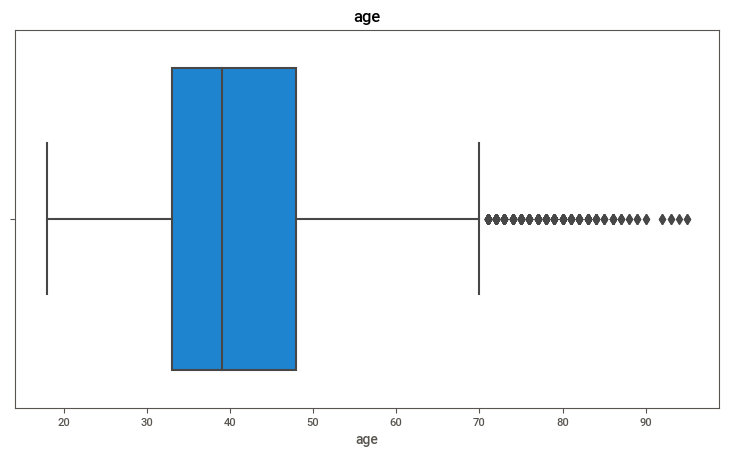

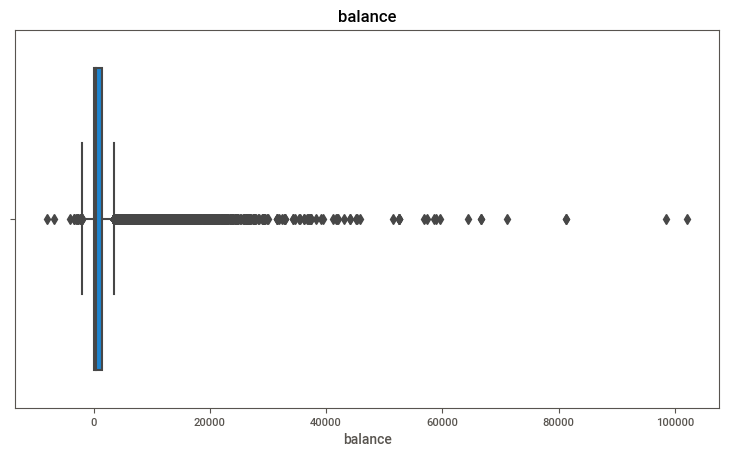

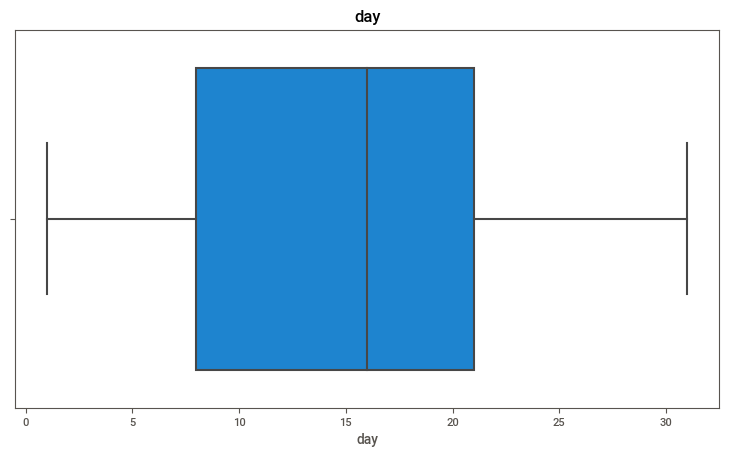

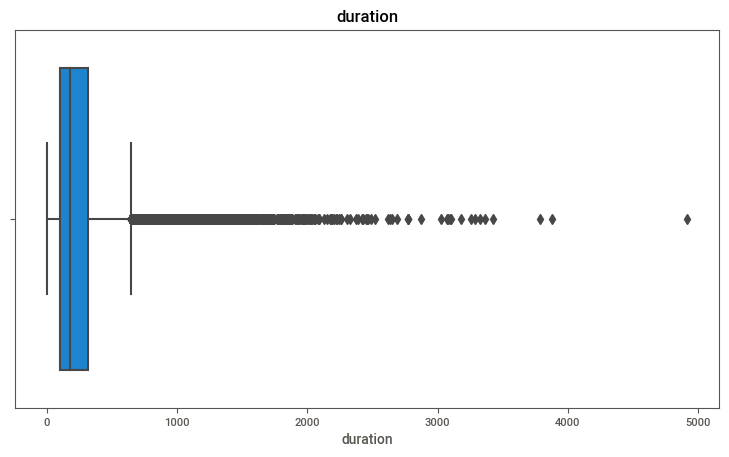

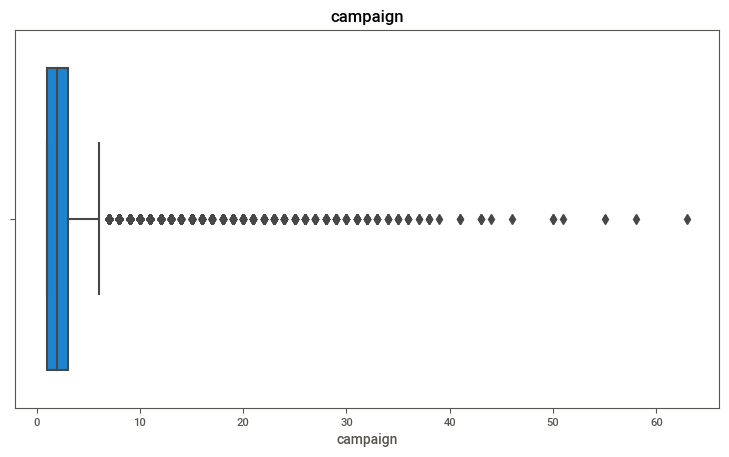

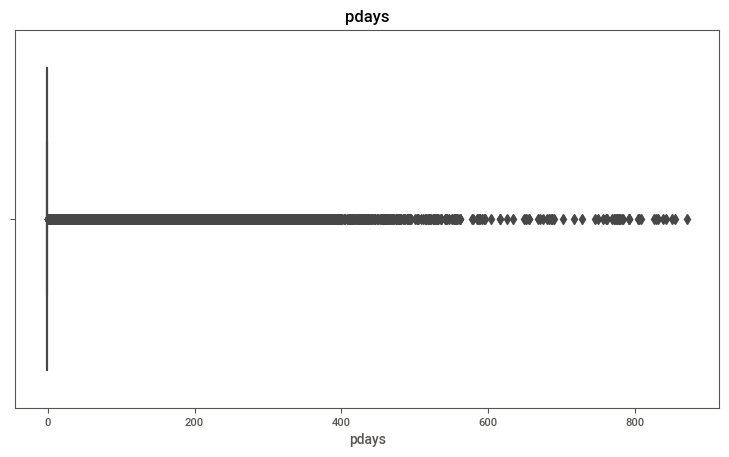

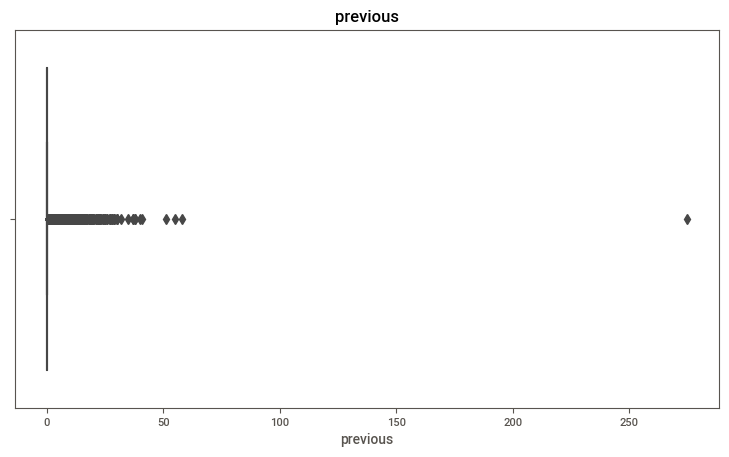

In [34]:
# Boxplot 
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(marketing_outcome[column])
    plt.title(column)

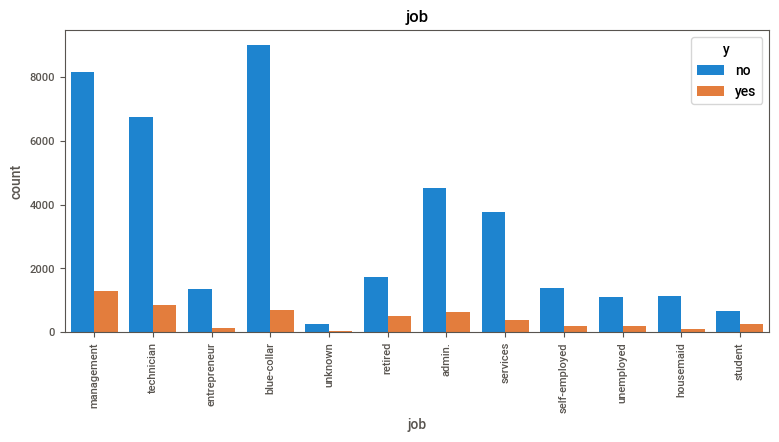

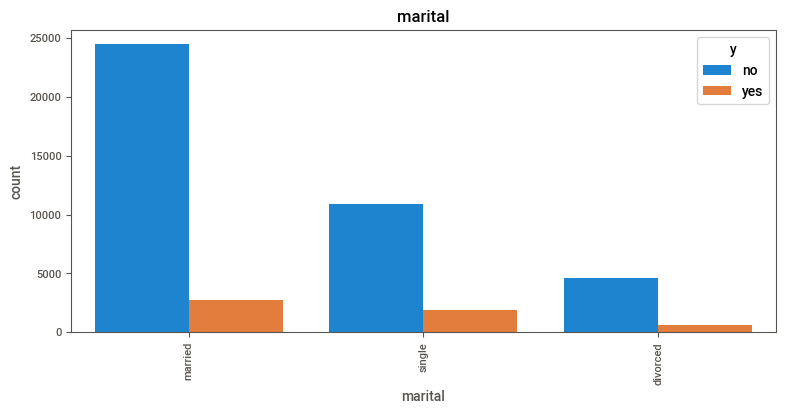

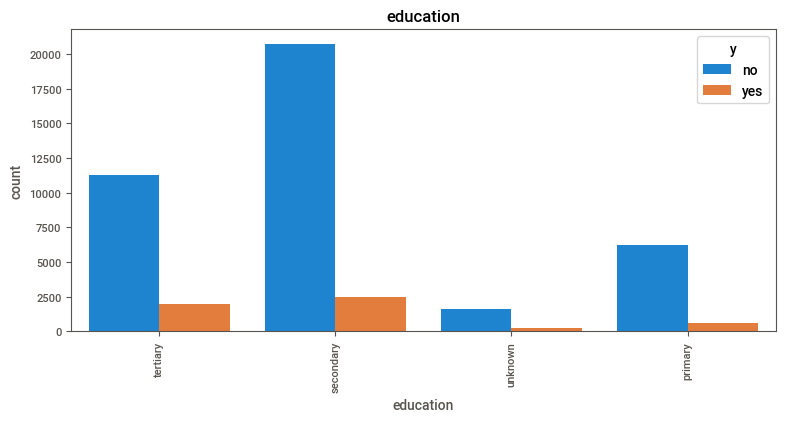

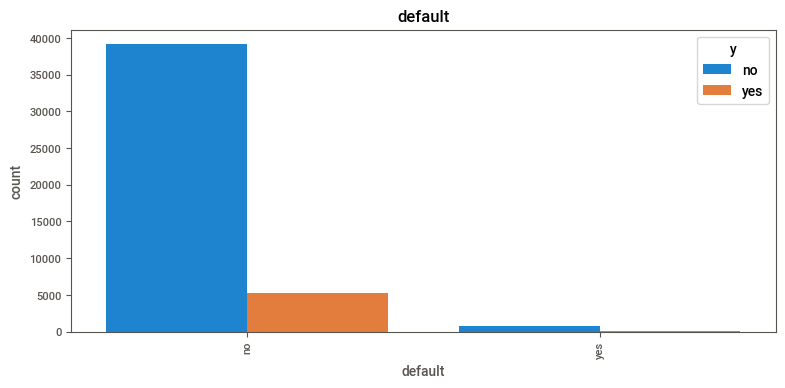

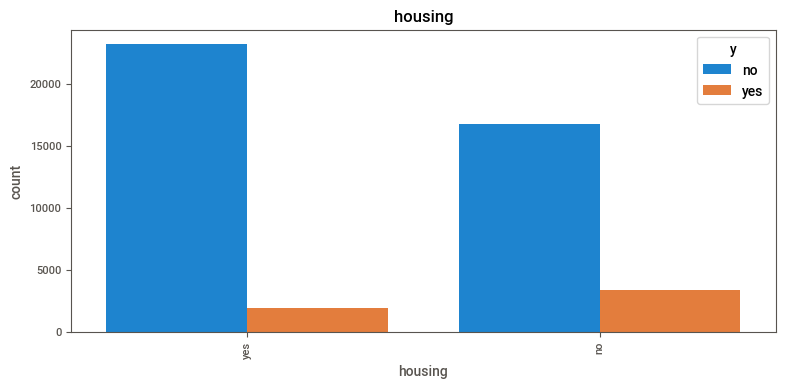

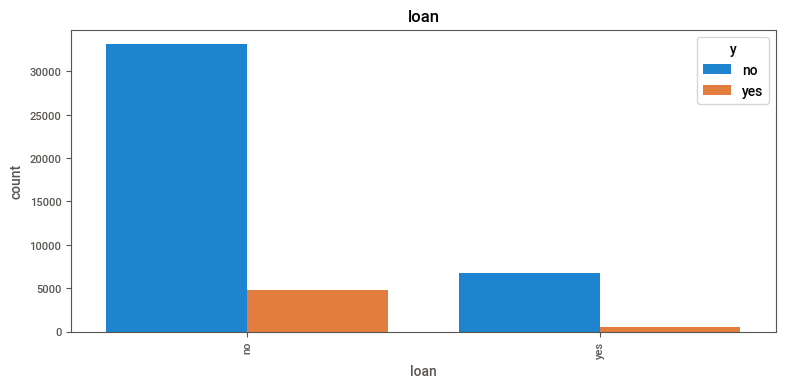

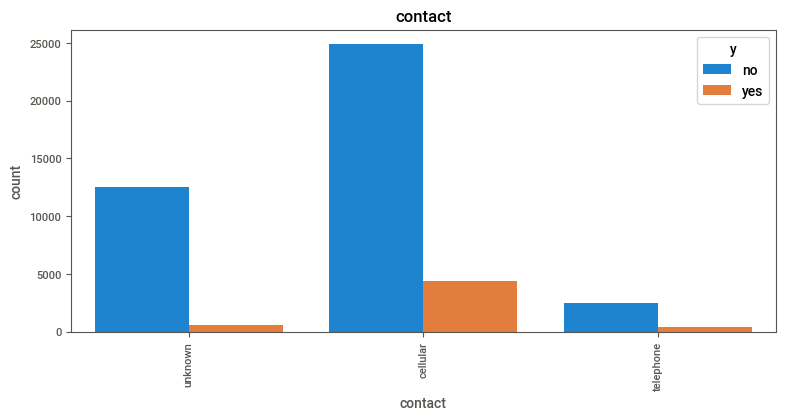

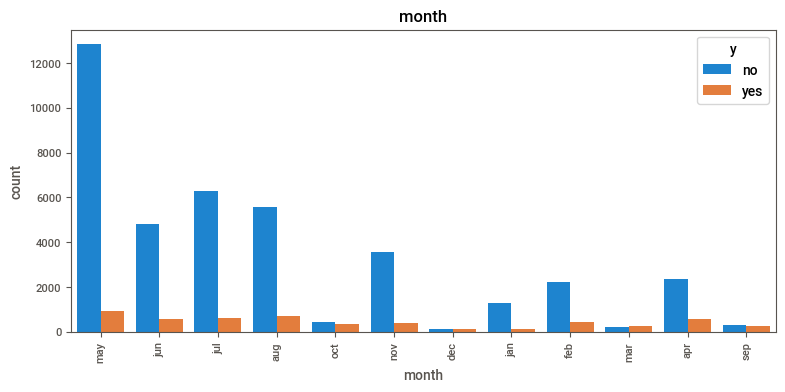

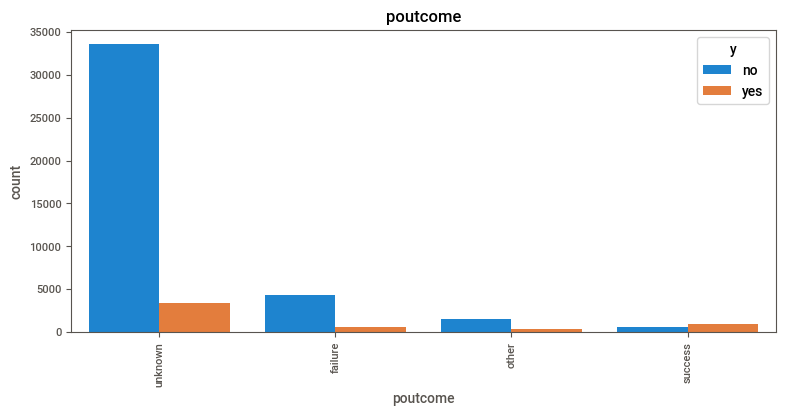

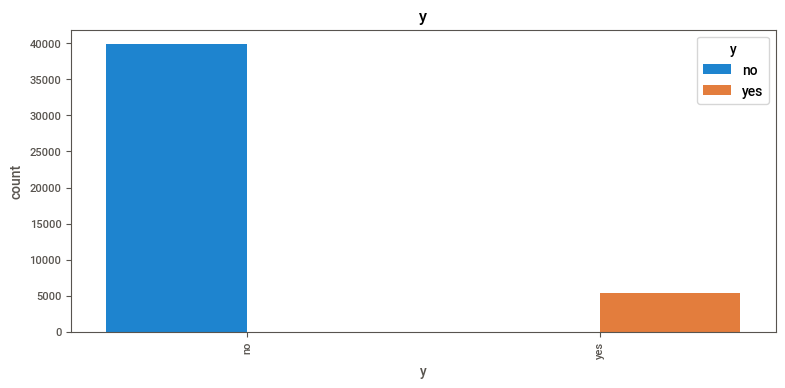

In [35]:
# Bivariate Analysis - Categorical Columns
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=marketing_outcome[column],hue=marketing_outcome['y'],data=marketing_outcome)
    plt.title(column)    
    plt.xticks(rotation=90)

#### Observations (For those who subscribed to desposit): 

* Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
* They are married
* They hold a university degree
* They do not hold a credit in default
* Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
* Cell-phones should be the preferred mode of contact for contacting customers.

# Clean Up